In [51]:
import os
import glob
import numpy as np
import pandas as pd

from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr,spearmanr

import matplotlib.pyplot as plt
import seaborn as sns

#  Pre and Post Video Attitude in Experiment 1

In [53]:
subs_change = pd.read_csv('/Users/li/Desktop/task-persuade/behavdata/subs_attitude_change.csv')
subs_change = np.array(subs_change.iloc[:])[:,1:]
print('subs_change.shape:',subs_change.shape)

subs_pre = pd.read_csv('/Users/li/Desktop/task-persuade/behavdata/subs_pre_attitude.csv')
subs_pre = np.array(subs_pre.iloc[:])[:,1:]
print('subs_pre.shape:',subs_pre.shape)

subs_post = pd.read_csv('/Users/li/Desktop/task-persuade/behavdata/subs_post_attitude.csv')
subs_post = np.array(subs_post.iloc[:])[:,1:]
print('subs_post.shape:',subs_post.shape)


subs_change.shape: (35, 15)
subs_pre.shape: (35, 15)
subs_post.shape: (35, 15)


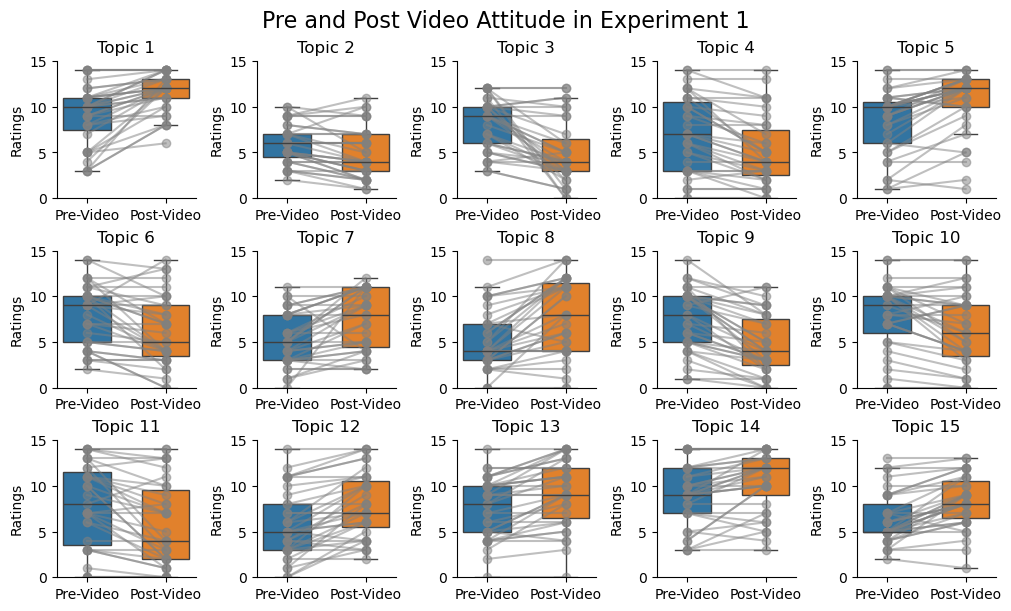

In [55]:

num_topics = subs_pre.shape[1]

# 创建子图
fig, axes = plt.subplots(3, 5, figsize=(10, 6), constrained_layout=True)
axes = axes.flatten()

for i in range(num_topics):
    ax = axes[i]
    
    # 组合数据
    data = np.vstack((subs_pre[:, i], subs_post[:, i])).T
    df = {
        "Pre": data[:, 0],
        "Post": data[:, 1],
        "Subject": np.arange(1, 36)  # 1到35的被试编号
    }
    
    # 画箱线图
    sns.boxplot(data=[df["Pre"], df["Post"]], ax=ax, width=0.6, showfliers=False)
    
    # 画线连接每个被试的前后测数据
    for j in range(35):
        ax.plot([0, 1], [df["Pre"][j], df["Post"][j]], marker='o', linestyle='-', color='gray', alpha=0.5)
    
    # 设置标题
    ax.set_title(f"Topic {i+1}")
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Pre-Video", "Post-Video"])
    ax.set_ylabel("Ratings")
    ax.set_ylim(0, 15)
    # 去除上边和右边的框线
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
plt.suptitle("Pre and Post Video Attitude in Experiment 1", fontsize=16)
# 保存图片
plt.savefig("pre_post_comparison_Exp_1_2.png", dpi=300, bbox_inches='tight')
plt.show()


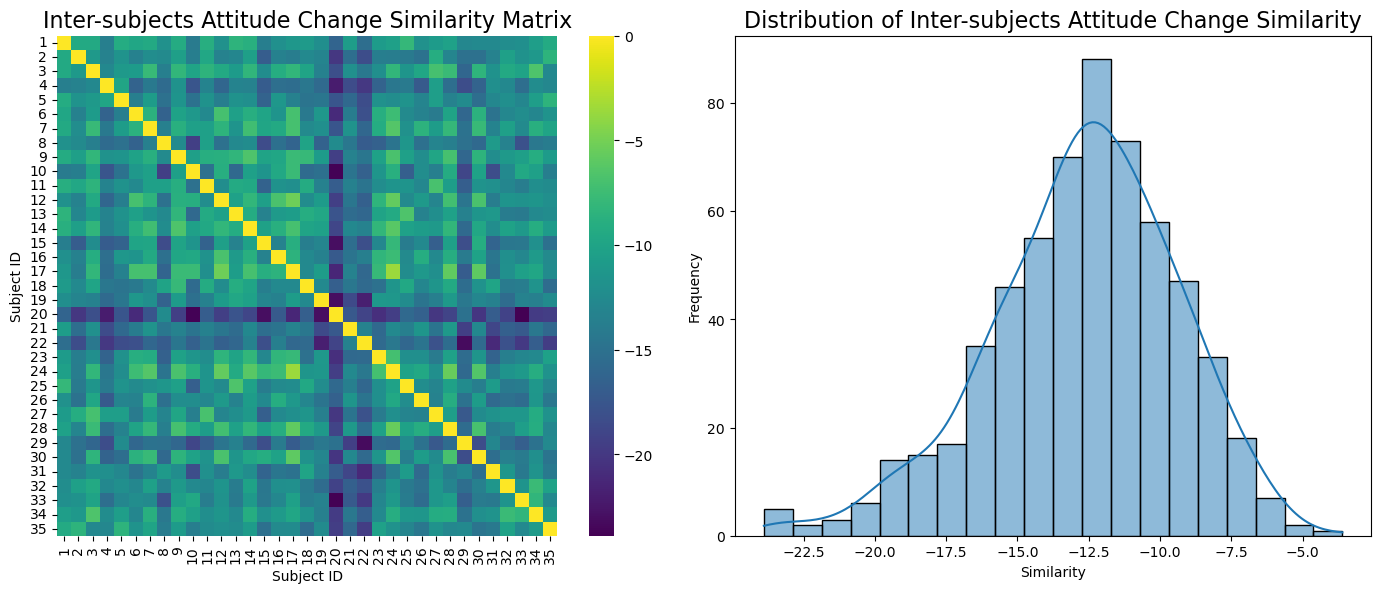

In [57]:
# 计算欧几里得距离
distances = -pdist(subs_change, metric='euclidean')
dist_matrix = squareform(distances)
change_SM = squareform(distances)

# 创建画布
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 绘制热图
sns.heatmap(change_SM, cmap='viridis', annot=False, square=True, xticklabels=np.arange(1, 36), 
            yticklabels=np.arange(1, 36), ax=axes[0])
axes[0].set_title("Inter-subjects Attitude Change Similarity Matrix",fontsize=16)
axes[0].set_xlabel("Subject ID")
axes[0].set_ylabel("Subject ID")

# 提取上三角元素（不包括对角线）
triu_indices = np.triu_indices_from(change_SM, k=1)
upper_tri_values = change_SM[triu_indices]

# 绘制上三角元素的分布
sns.histplot(upper_tri_values, bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Inter-subjects Attitude Change Similarity",fontsize=16)
axes[1].set_xlabel("Similarity")
axes[1].set_ylabel("Frequency")

# 调整布局
plt.tight_layout()
plt.savefig("Exp_1_Inter-subjects Attitude Change Similarity.png", dpi=300, bbox_inches='tight')
plt.show()

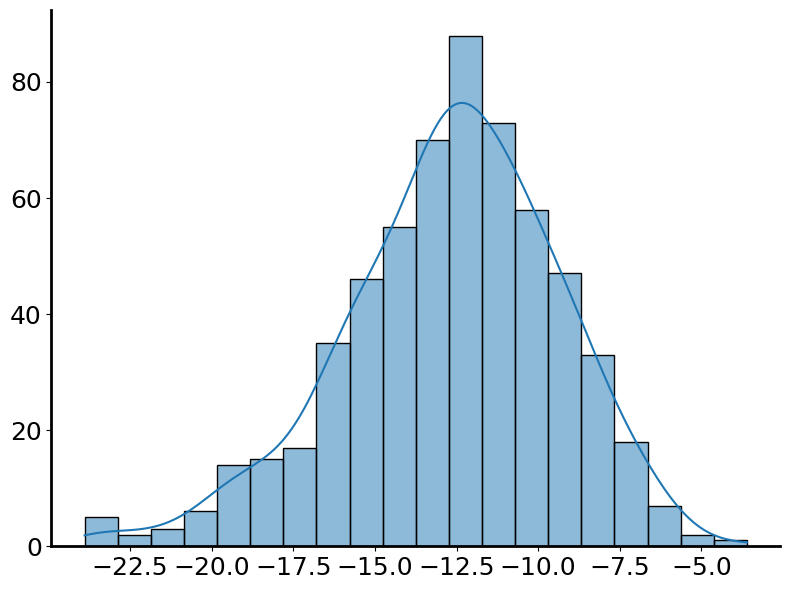

In [61]:

plt.figure(figsize=(8, 6))

sns.histplot(upper_tri_values, bins=20, kde=True)

plt.gca().spines['top'].set_visible(False)  # 去掉上框线
plt.gca().spines['right'].set_visible(False)  # 去掉右框线
plt.gca().spines['left'].set_linewidth(2)  # 设置左框线宽度
plt.gca().spines['bottom'].set_linewidth(2)  # 设置下框线宽度
# plt.gca().grid(False)  # 关闭网格线
plt.gca().tick_params(axis='both', labelsize=18) 
plt.ylabel("")


# 调整布局
plt.tight_layout()
plt.savefig('/Users/li/Desktop/Figure/3c_Distribution.png', dpi=300)
plt.show()

# Pre and Post Speaker Attitude in Experiment 2.

In [93]:
bahav_data_dir = '/Users/li/Desktop/task-debate/behavdata'

sub_list_num = list(range(13,51))
sub_list_num.remove(21)

# time_points = list(range(0,3000,60)) + [2986]  # every 1 minute
# time_points = list(range(0,3000,120)) + [2986] # every 2 min
# time_points = list(range(0,3000,300)) + [2986] # every 5 min
time_points = [0, 252, 500, 772, 1098, 1484, 1892, 2464, 2986] # every speaker

all_subject_data = []
for sub in sub_list_num:
    file_path = os.path.join(bahav_data_dir, 'during_scan', 'combined_6runs_per_TR_filter', f'subject_{sub}_TR_rate.csv')
    
    df = pd.read_csv(file_path)
    sub_data = df[df['time'].isin(time_points)]
    all_subject_data.append(list(sub_data['rate']))

attitude = pd.DataFrame(all_subject_data)


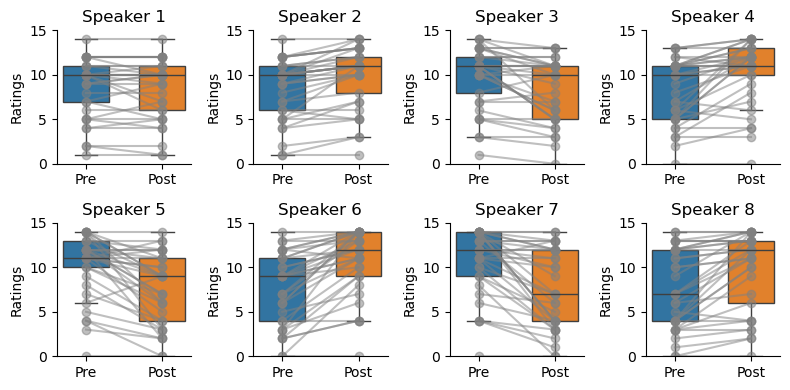

In [119]:
subs_change = np.array(attitude)  # 37个被试，9次测量数据

# 创建画布，设置子图数量和大小
fig, axes = plt.subplots(2, 4, figsize=(8, 4))

# 遍历每对相邻的测量，画出每对之间的箱线图
for i in range(8):
    ax = axes[i // 4, i % 4]  # 确定位置
    
    # 创建DataFrame，包含Pre和Post的数据
    df = {
        "Pre": subs_change[:, i],  # 当前列数据（Pre）
        "Post": subs_change[:, i + 1],  # 下一列数据（Post）
        "Subject": np.arange(1, 38)  # 被试编号
    }
    df = pd.DataFrame(df)
    
    # 画箱线图
    sns.boxplot(data=[df["Pre"], df["Post"]], ax=ax, width=0.6, showfliers=False)
    
    # 画线连接每个被试的前后测数据
    for j in range(35):
        ax.plot([0, 1], [df["Pre"][j], df["Post"][j]], marker='o', linestyle='-', color='gray', alpha=0.5)
    
    # 设置标题
    ax.set_title(f"Speaker {i+1}")
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Pre", "Post"])
    ax.set_ylabel("Ratings")
    ax.set_ylim(0, 15)
    # 去除上边和右边的框线
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

# 调整布局
plt.tight_layout()
# 保存图片
plt.savefig("pre_post_speakek_Exp_2.png", dpi=300, bbox_inches='tight')

plt.show()

(37, 25)
(37, 37)


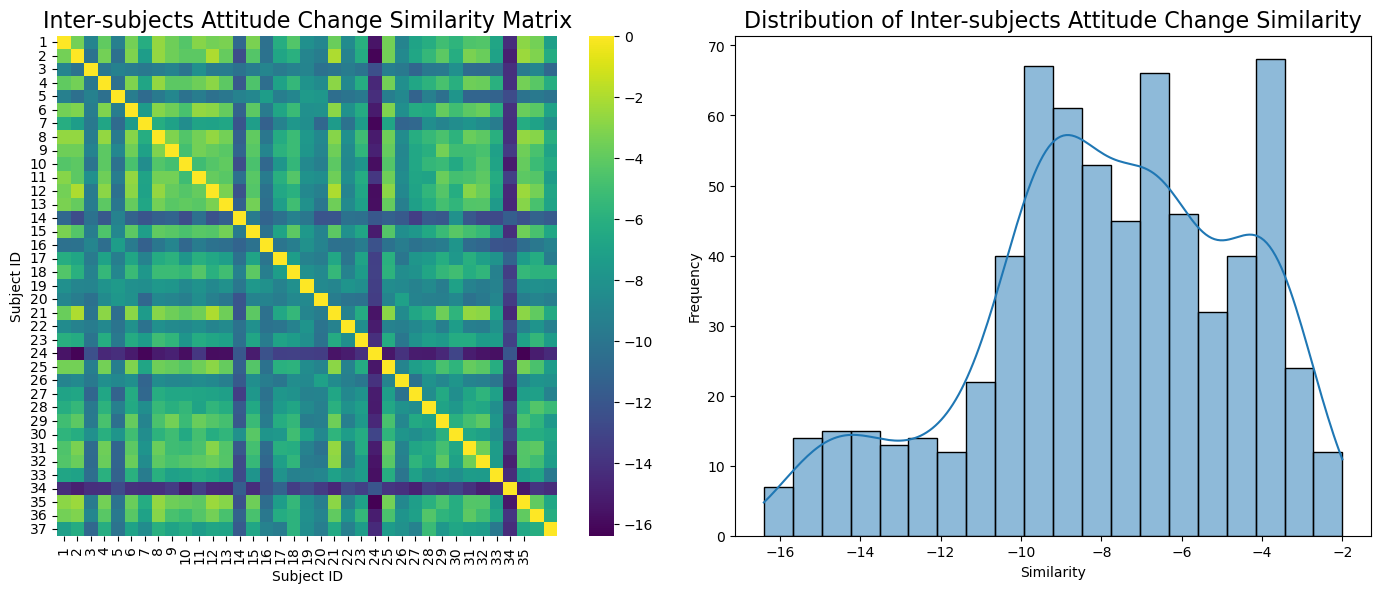

In [127]:
bahav_data_dir = '/Users/li/Desktop/task-debate/behavdata'

sub_list_num = list(range(13,51))
sub_list_num.remove(21)

# time_points = list(range(0,3000,60)) + [2986]  # every 1 minute
time_points = list(range(0,3000,120)) + [2986] # every 2 min
# time_points = list(range(0,3000,300)) + [2986] # every 5 min
# time_points = [0, 252, 500, 772, 1098, 1484, 1892, 2464, 2986] # every speaker

all_subject_data = []
for sub in sub_list_num:
    file_path = os.path.join(bahav_data_dir, 'during_scan', 'combined_6runs_per_TR_filter', f'subject_{sub}_TR_rate.csv')
    
    df = pd.read_csv(file_path)
    sub_data = df[df['time'].isin(time_points)]
    all_subject_data.append(list(sub_data['rate']))

attitude = pd.DataFrame(all_subject_data)

attitude_change = attitude.diff(axis=1)
attitude_change = attitude_change.drop(attitude_change.columns[0], axis=1)
print(attitude_change.shape)

attitude_change_distances = -pdist(attitude_change)
# attitude_change_distances = -np.sqrt(pdist(attitude_change))
# attitude_change_distances = -np.log(pdist(attitude_change))
attitude_change_SM = squareform(attitude_change_distances)
print(attitude_change_SM.shape)

# 创建画布
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 绘制热图
sns.heatmap(attitude_change_SM, cmap='viridis', annot=False, square=True, xticklabels=np.arange(1, 36), 
            yticklabels=np.arange(1, 38), ax=axes[0])
axes[0].set_title("Inter-subjects Attitude Change Similarity Matrix",fontsize=16)
axes[0].set_xlabel("Subject ID")
axes[0].set_ylabel("Subject ID")

# 提取上三角元素（不包括对角线）
triu_indices = np.triu_indices_from(attitude_change_SM, k=1)
upper_tri_values = attitude_change_SM[triu_indices]

# 绘制上三角元素的分布
sns.histplot(upper_tri_values, bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Inter-subjects Attitude Change Similarity",fontsize=16)
axes[1].set_xlabel("Similarity")
axes[1].set_ylabel("Frequency")

# 调整布局
plt.tight_layout()
plt.savefig("Exp_1_Inter-subjects Attitude Change Similarity.png", dpi=300, bbox_inches='tight')
plt.show()

(37, 1493)
(37, 37)


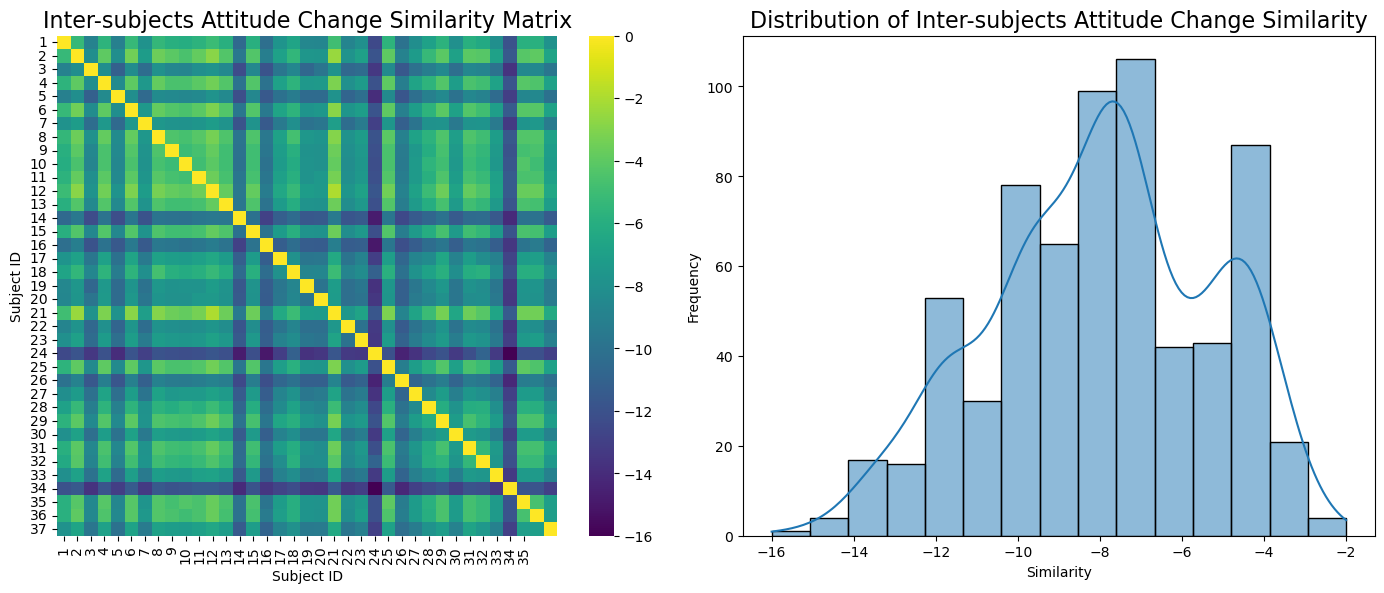

In [137]:
bahav_data_dir = '/Users/li/Desktop/task-debate/behavdata'

sub_list_num = list(range(13,51))
sub_list_num.remove(21)

time_points = list(range(0,2986,2)) + [2986]  # every 1 minute
# time_points = list(range(0,3000,120)) + [2986] # every 2 min
# time_points = list(range(0,3000,300)) + [2986] # every 5 min
# time_points = [0, 252, 500, 772, 1098, 1484, 1892, 2464, 2986] # every speaker

all_subject_data = []
for sub in sub_list_num:
    file_path = os.path.join(bahav_data_dir, 'during_scan', 'combined_6runs_per_TR_filter', f'subject_{sub}_TR_rate.csv')
    
    df = pd.read_csv(file_path)
    sub_data = df[df['time'].isin(time_points)]
    all_subject_data.append(list(sub_data['rate']))

attitude = pd.DataFrame(all_subject_data)

attitude_change = attitude.diff(axis=1)
attitude_change = attitude_change.drop(attitude_change.columns[0], axis=1)
print(attitude_change.shape)

attitude_change_distances = -pdist(attitude_change)
# attitude_change_distances = -np.sqrt(pdist(attitude_change))
# attitude_change_distances = -np.log(pdist(attitude_change))
attitude_change_SM = squareform(attitude_change_distances)
print(attitude_change_SM.shape)

# 创建画布
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 绘制热图
sns.heatmap(attitude_change_SM, cmap='viridis', annot=False, square=True, xticklabels=np.arange(1, 36), 
            yticklabels=np.arange(1, 38), ax=axes[0])
axes[0].set_title("Inter-subjects Attitude Change Similarity Matrix",fontsize=16)
axes[0].set_xlabel("Subject ID")
axes[0].set_ylabel("Subject ID")

# 提取上三角元素（不包括对角线）
triu_indices = np.triu_indices_from(attitude_change_SM, k=1)
upper_tri_values = attitude_change_SM[triu_indices]

# 绘制上三角元素的分布
sns.histplot(upper_tri_values, bins=15, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Inter-subjects Attitude Change Similarity",fontsize=16)
axes[1].set_xlabel("Similarity")
axes[1].set_ylabel("Frequency")

# 调整布局
plt.tight_layout()
plt.savefig("Exp_1_Inter-subjects Attitude Change Similarity.png", dpi=300, bbox_inches='tight')
plt.show()

# attitude change point

In [5]:
bahav_data_dir = '/Users/li/Desktop/task-debate/behavdata'

sub_list_num = list(range(13,51))
sub_list_num.remove(21)

time_points = list(range(0,2986,2)) + [2986]  # every TR minute
all_subject_data = []
for sub in sub_list_num:
    file_path = os.path.join(bahav_data_dir, 'during_scan', 'combined_6runs_per_TR_filter', f'subject_{sub}_TR_rate.csv')
    
    df = pd.read_csv(file_path)
    sub_data = df[df['time'].isin(time_points)]
    all_subject_data.append(list(sub_data['rate']))

attitude = pd.DataFrame(all_subject_data)
print(attitude.shape)

(37, 1494)


In [7]:

attitude_change_point = attitude.diff(axis=1)
attitude_change_point = attitude_change_point.drop(attitude_change_point.columns[0], axis=1)
df_binary = (attitude_change_point != 0).astype(int)
subs_change_points = np.array(df_binary)
subs_change_points.shape

(37, 1493)

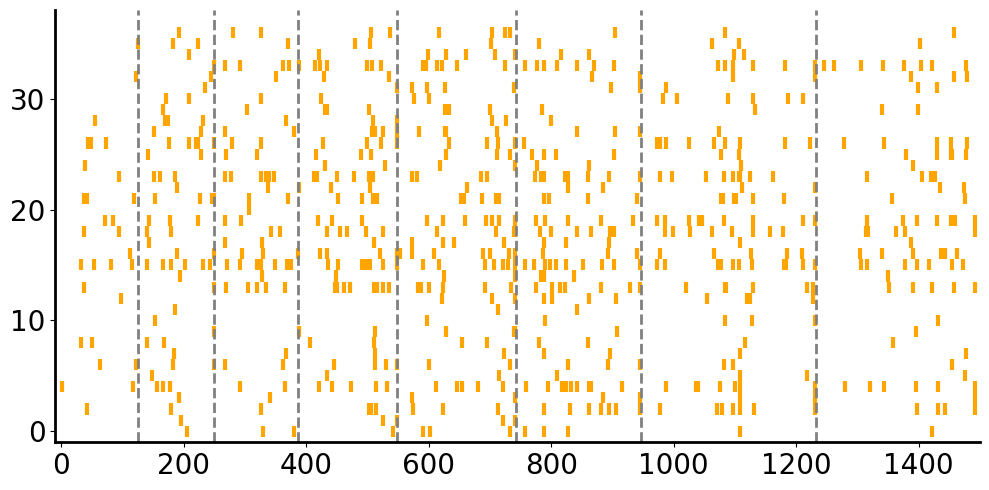

In [23]:
# 设置画布大小为长条状，1:10比例
plt.figure(figsize=(10, 5))  # 高度是宽度的10倍

# 获取当前轴对象
ax = plt.gca()

# 给每个被试（每行）画竖线，表示态度变化点
for i in range(subs_change_points.shape[0]):  # 遍历所有被试
    change_points = np.where(subs_change_points[i] == 1)[0]  # 找出变化点的索引
    plt.vlines(change_points, ymin=i-0.5, ymax=i+0.5, color='orange', linewidth=3)
# 设置需要绘制虚线的时间点，并除以2
highlight_points = [252, 500, 772, 1098, 1484, 1892, 2464]
highlight_points = np.array(highlight_points) // 2  # 除以2
# 绘制虚线
for point in highlight_points:
    plt.axvline(x=point, color='grey', linestyle='--', linewidth=2)
# 设置标题和标签
# plt.title('Subject-wise Attitude Change Points', fontsize=16)
# plt.xlabel('Time (1493 TRs)', fontsize=12)
# plt.ylabel('Subjects (N=37)', fontsize=12)

# 去除上边和右边的框线
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xlim(-10, 1500)
plt.ylim(-1, 38)
# 隐藏坐标轴数字
# ax.set_xticks([])
# ax.set_yticks([])

ax.tick_params(axis='both', labelsize=20) 

# 加粗左边和下边的轴线
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
# 调整布局，避免标签重叠
plt.tight_layout()

# 保存图像
plt.savefig('/Users/li/Desktop/Figure/3b.png', dpi=300)

# 显示图像
plt.show()

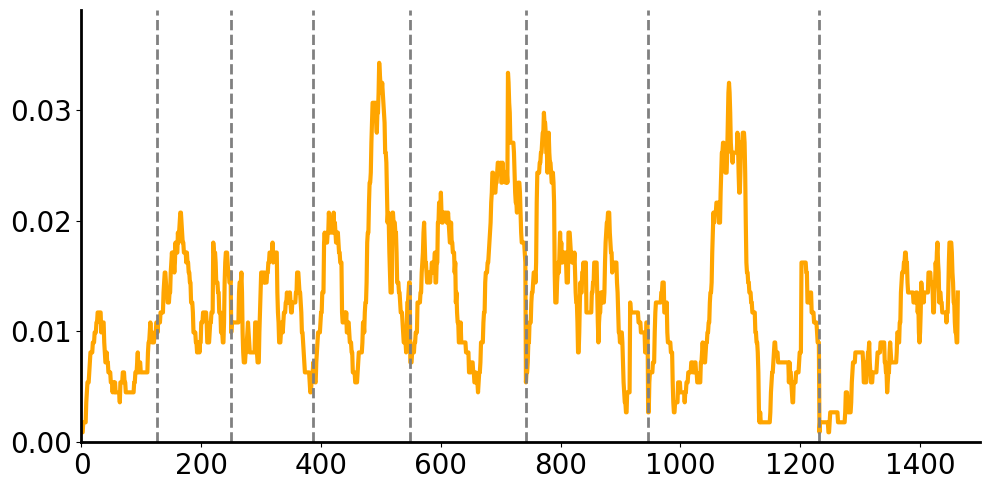

In [41]:
# 设置滑动窗口的大小
window_size = 30  # 例如，每次窗口包含30个时间点
step_size = 1  # 每次移动1个时间点

# 计算滑动窗口内的变化点频率
num_windows = subs_change_points.shape[1] - window_size + 1
windowed_change_freq = []

for i in range(num_windows):
    # 提取当前窗口的数据
    window_data = subs_change_points[:, i:i + window_size]
    # 计算该窗口内的变化点频率（即每个时间点上1的比例）
    window_freq = np.mean(window_data, axis=0)
    # 计算窗口内变化点的平均频率
    windowed_change_freq.append(np.mean(window_freq))

# 转换为 numpy 数组
windowed_change_freq = np.array(windowed_change_freq)



# 绘制滑动窗口下的变化点频率趋势
plt.figure(figsize=(10, 5))
plt.plot(windowed_change_freq, color='orange', linewidth=3)

# 设置需要绘制虚线的时间点，并除以2
highlight_points = [252, 500, 772, 1098, 1484, 1892, 2464]
highlight_points = np.array(highlight_points) // 2  # 除以2
# 绘制虚线
for point in highlight_points:
    plt.axvline(x=point, color='grey', linestyle='--', linewidth=2)

# 设置标题和标签
# plt.title('Attitude Change Point Frequency (Sliding Window)', fontsize=16)
# plt.xlabel('Time(Windows)', fontsize=12)
# plt.ylabel('Average Change Point Frequency', fontsize=12)
plt.xlim(0, 1500)
plt.ylim(0, 0.039)
# 获取当前轴对象
ax = plt.gca()
# 去除上边和右边的框线
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='both', labelsize=20) 

# 加粗左边和下边的轴线
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
# 调整布局，避免标签重叠
plt.tight_layout()
# 保存图像
plt.savefig('/Users/li/Desktop/Figure/3d.png', dpi=300)
# plt.savefig('attitude_change_points_Frequency.png', dpi=300)
# 显示图像
plt.show()

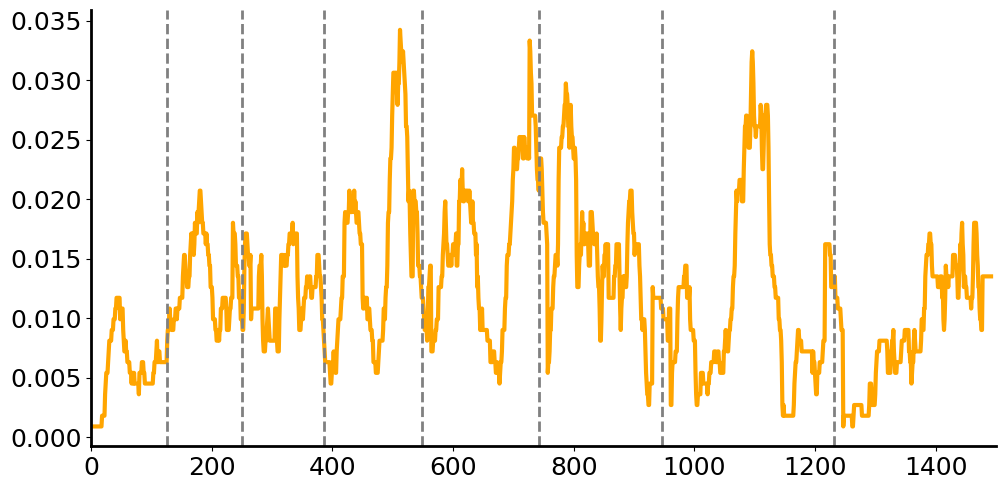

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# 设置滑动窗口的大小
window_size = 30  # 例如，每次窗口包含30个时间点
step_size = 1  # 每次移动1个时间点

# 计算滑动窗口内的变化点频率
num_windows = subs_change_points.shape[1] - window_size + 1
windowed_change_freq = []

for i in range(num_windows):
    # 提取当前窗口的数据
    window_data = subs_change_points[:, i:i + window_size]
    # 计算该窗口内的变化点频率（即每个时间点上1的比例）
    window_freq = np.mean(window_data, axis=0)
    # 计算窗口内变化点的平均频率
    windowed_change_freq.append(np.mean(window_freq))

# 转换为 numpy 数组
windowed_change_freq = np.array(windowed_change_freq)

# 创建一个新的数组来存储补充的变化点频率
full_change_freq = np.zeros(subs_change_points.shape[1])

# 将滑动窗口的结果插入到中间位置
for i in range(num_windows):
    center_position = i + window_size // 2
    full_change_freq[center_position] = windowed_change_freq[i]

# 使用线性插值填充前后的数据
# 填充前面的部分（0到window_size // 2）
start_value = full_change_freq[window_size // 2]  # 第一个窗口的中间值
full_change_freq[:window_size // 2] = start_value

# 填充后面的部分（window_size // 2到结束）
end_value = full_change_freq[-window_size // 2]  # 最后一个窗口的中间值
full_change_freq[-window_size // 2:] = end_value

# 绘制滑动窗口下的变化点频率趋势
plt.figure(figsize=(10, 5))
plt.plot(full_change_freq, color='orange', linewidth=3)

# 设置需要绘制虚线的时间点，并除以2
highlight_points = [252, 500, 772, 1098, 1484, 1892, 2464]
highlight_points = np.array(highlight_points) // 2  # 除以2
# 绘制虚线
for point in highlight_points:
    plt.axvline(x=point, color='grey', linestyle='--', linewidth=2)

# # 设置标题和标签
# plt.title('Attitude Change Point Frequency (Sliding Window)', fontsize=16)
# plt.xlabel('Time(Windows)', fontsize=12)
# plt.ylabel('Average Change Point Frequency', fontsize=12)


plt.xlim(0, 1500)
# plt.ylim(0, 0.3)
# 获取当前轴对象
ax = plt.gca()
# 去除上边和右边的框线
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# 调整布局，避免标签重叠
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='both', labelsize=18) 

# 加粗左边和下边的轴线
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
# 调整布局，避免标签重叠
plt.tight_layout()
# 保存图像
plt.savefig('/Users/li/Desktop/Figure/3d.png', dpi=300)
# 显示图像
plt.show()


In [346]:
full_change_freq.shape

(1493,)

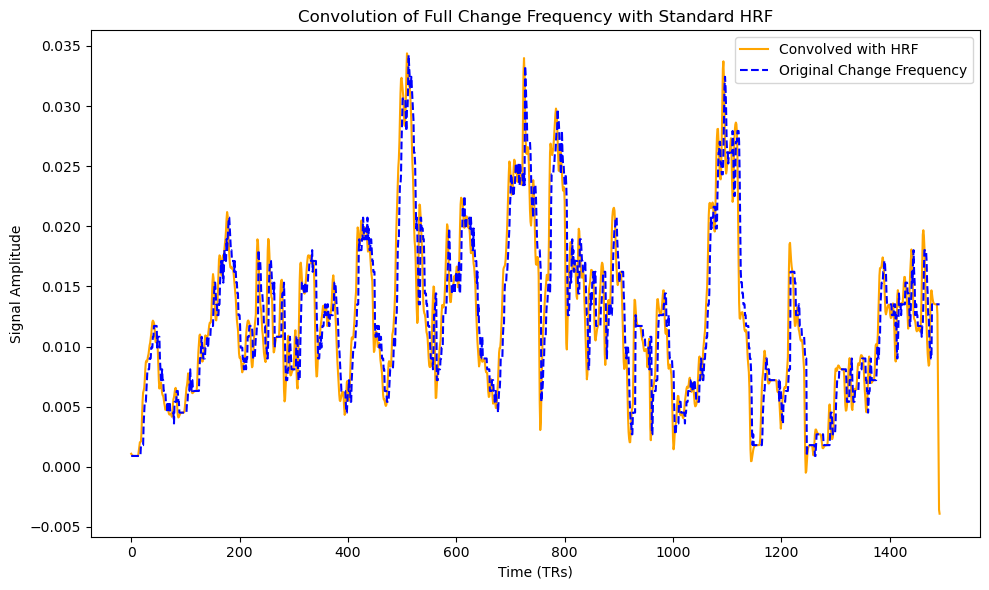

In [394]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn.glm.first_level import spm_hrf
from scipy.signal import convolve

from nltools.external import glover_hrf
tr = 2
hrf = glover_hrf(tr, oversampling=1)
convolved_result = np.convolve(full_change_freq, hrf, mode='same')

# 3. 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(convolved_result, label='Convolved with HRF', color='orange')
plt.plot(full_change_freq, label='Original Change Frequency', color='blue', linestyle='--')
plt.title('Convolution of Full Change Frequency with Standard HRF')
plt.xlabel('Time (TRs)')
plt.ylabel('Signal Amplitude')
plt.legend()
plt.tight_layout()
plt.show()


In [392]:
pearsonr(convolved_result,dacc_brain_data.mean(0))

PearsonRResult(statistic=-0.027859046903961134, pvalue=0.28203331605694304)

# a example of dACC activty

In [296]:

base_dir = '/Users/li/Desktop/debate/braindata'

sub_list = [f'sub-{x:0>3d}' for x in range(13,51)]
sub_list.remove('sub-021')

subs_roi_data = []
for sub in sub_list:
    csv_file = f'/Volumes/Li/task-debate/braindata/denoised 5/parcel data/Schaefer 200 combine 6 runs/{sub}_combined_time-series_Schaefer2018_200Parcels_7Networks.csv'
    sub_data = pd.read_csv(csv_file)
    subs_roi_data.append(sub_data.values)

all_brain_data = np.array(subs_roi_data)
print(all_brain_data.shape)
dacc_brain_data = all_brain_data[:,:,89]
dacc_brain_data.shape

(37, 1493, 200)


(37, 1493)

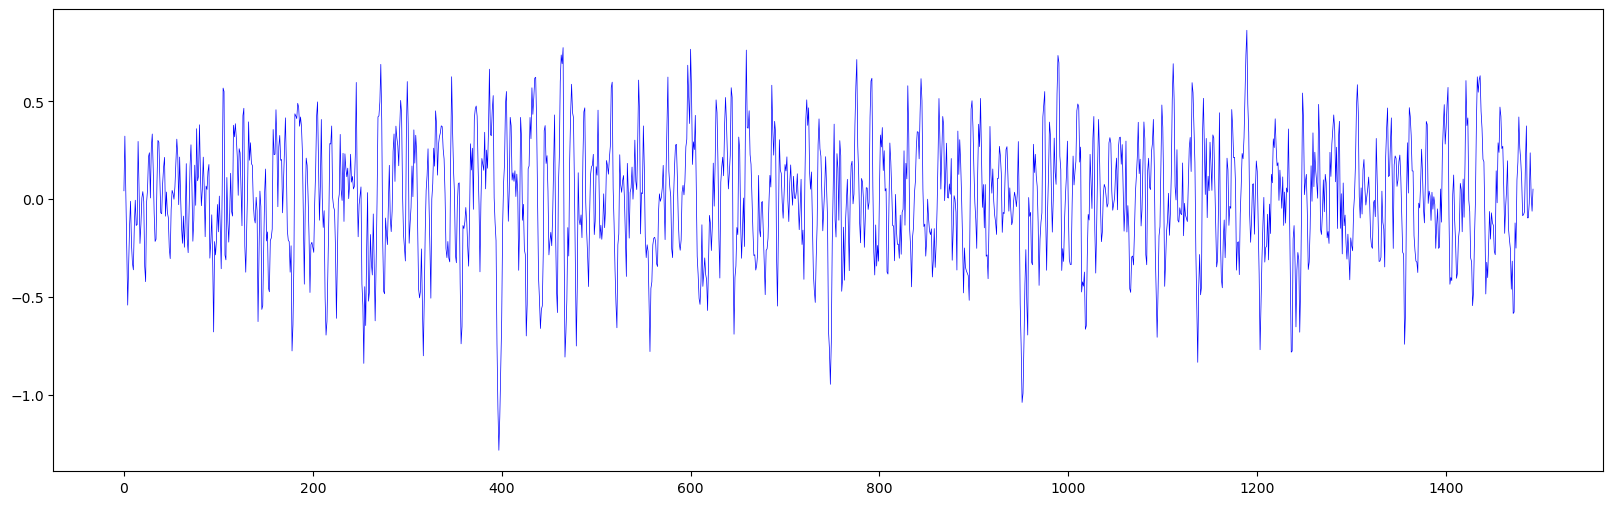

In [338]:
plt.figure(figsize=(20, 6))
plt.plot(dacc_brain_data.mean(0), label='Brain Data', color='blue',linewidth=0.5)

In [298]:
bahav_data_dir = '/Users/li/Desktop/task-debate/behavdata'

sub_list_num = list(range(13,51))
sub_list_num.remove(21)

time_points = list(range(0,2986,2)) + [2986]  # every TR minute
all_subject_data = []
for sub in sub_list_num:
    file_path = os.path.join(bahav_data_dir, 'during_scan', 'combined_6runs_per_TR_filter', f'subject_{sub}_TR_rate.csv')
    
    df = pd.read_csv(file_path)
    sub_data = df[df['time'].isin(time_points)]
    all_subject_data.append(list(sub_data['rate']))

attitude = pd.DataFrame(all_subject_data)
print(attitude.shape)

attitude_change_point = attitude.diff(axis=1)
attitude_change_point = attitude_change_point.drop(attitude_change_point.columns[0], axis=1)
df_binary = (attitude_change_point != 0).astype(int)
subs_change_points = np.array(df_binary)
subs_change_points.shape

(37, 1494)


(37, 1493)

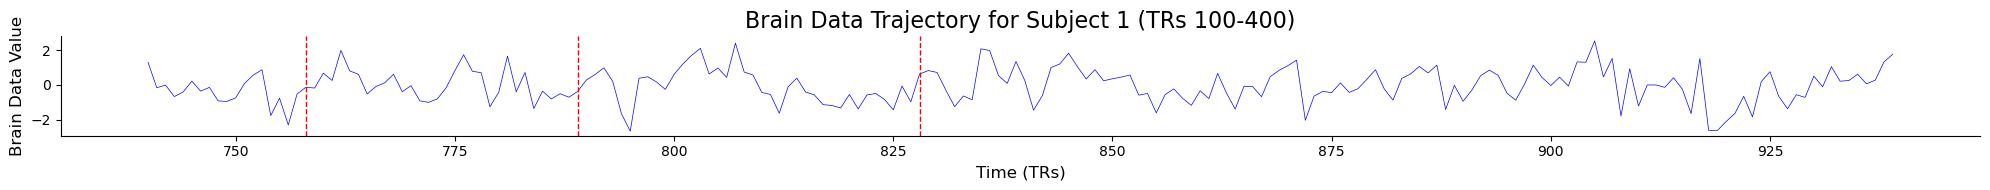

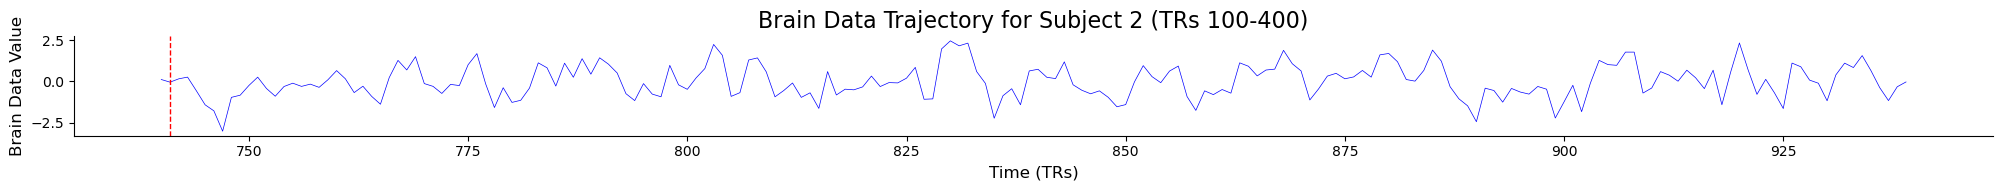

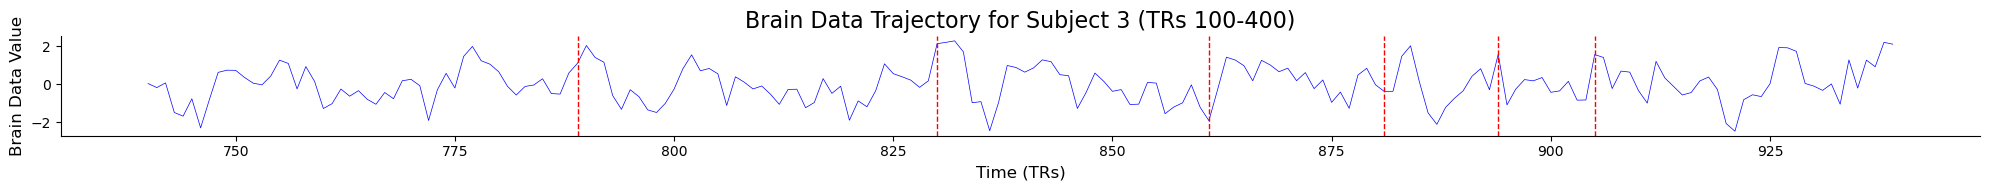

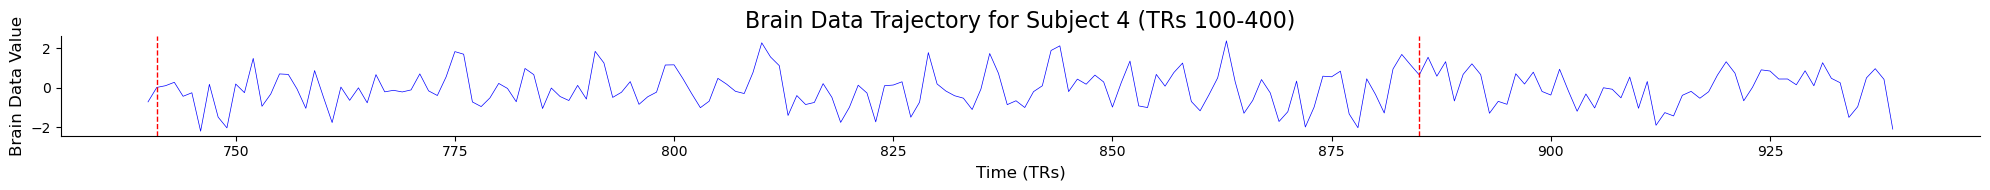

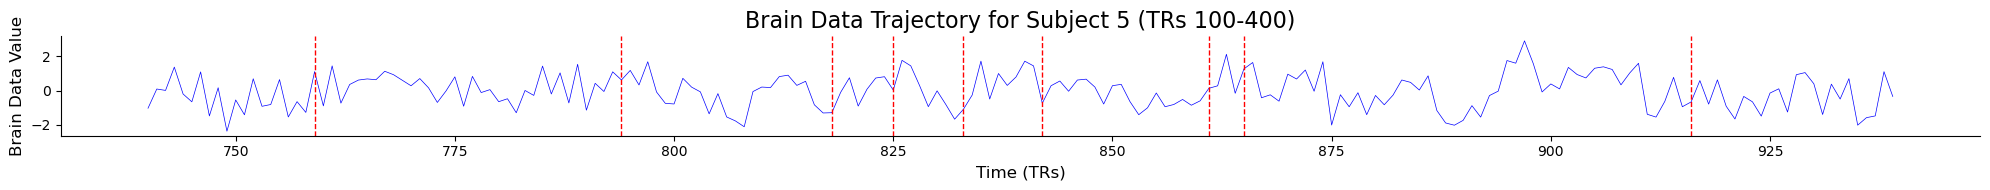

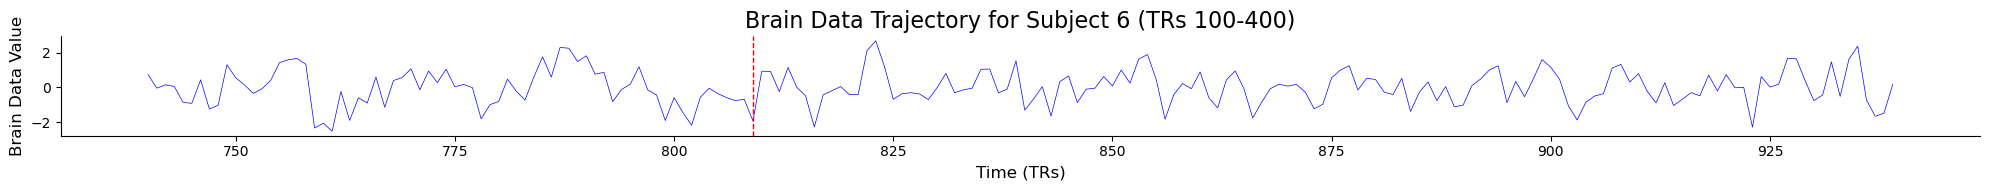

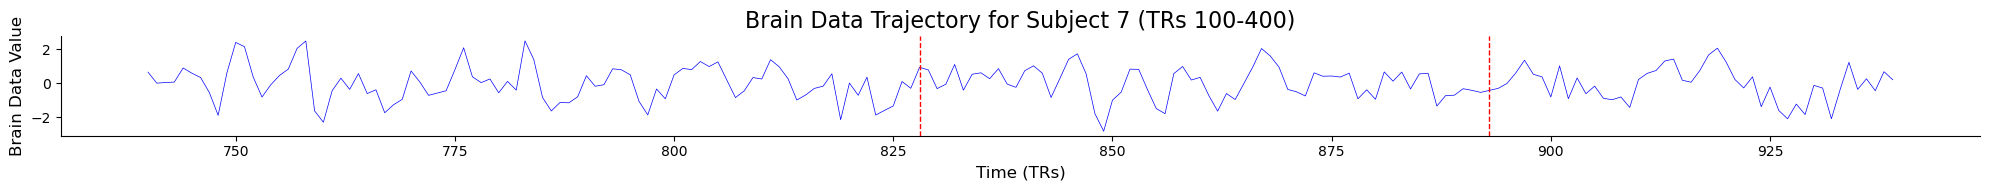

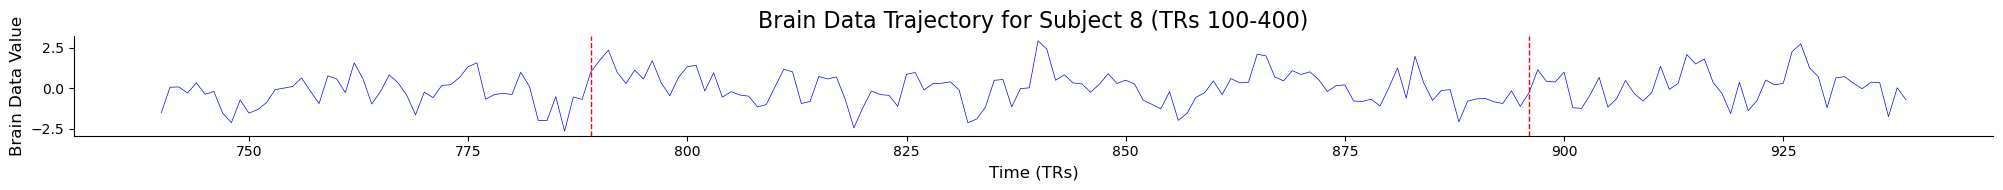

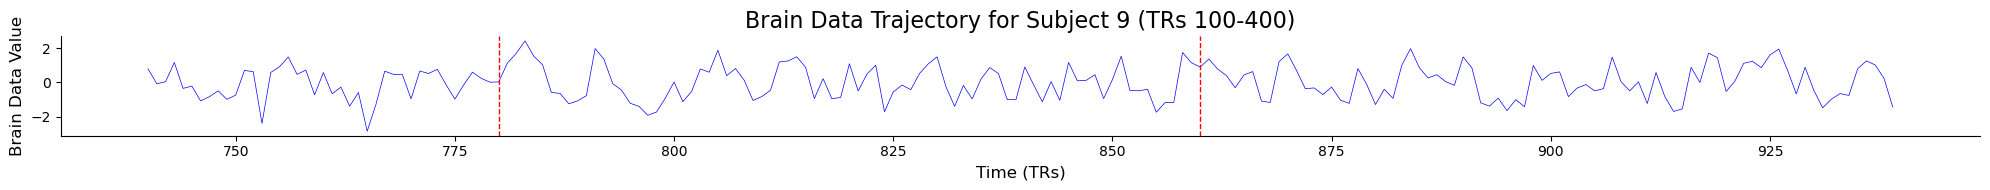

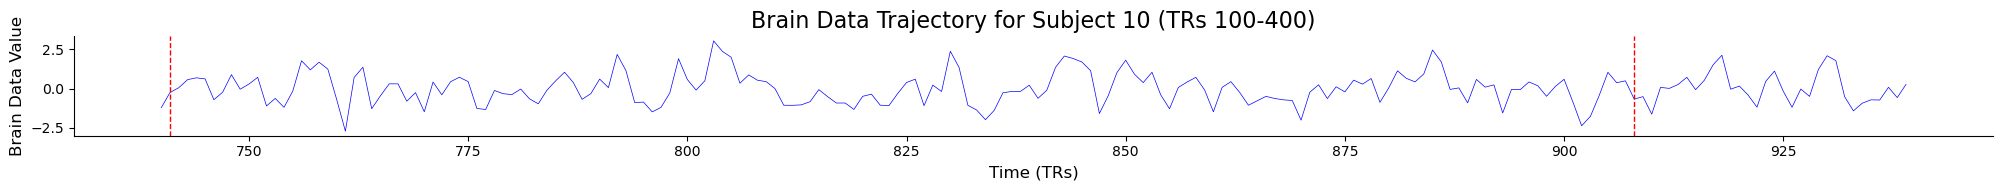

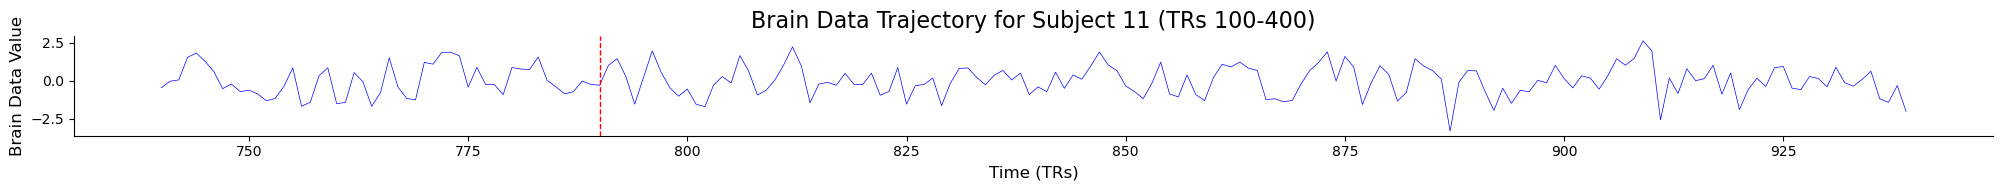

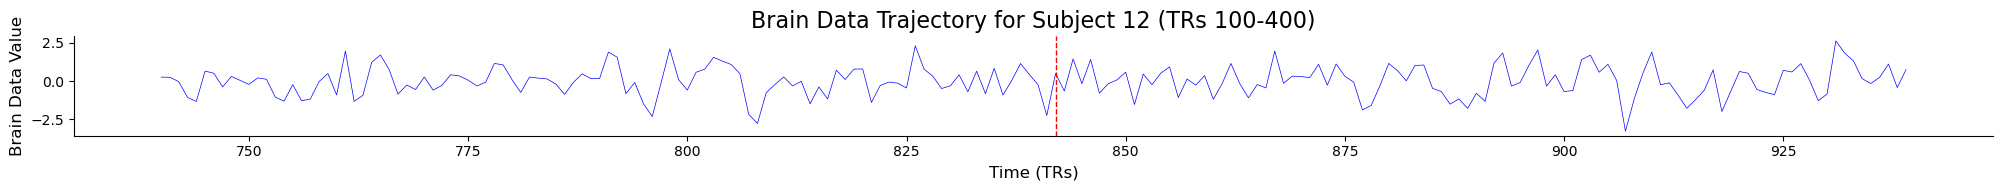

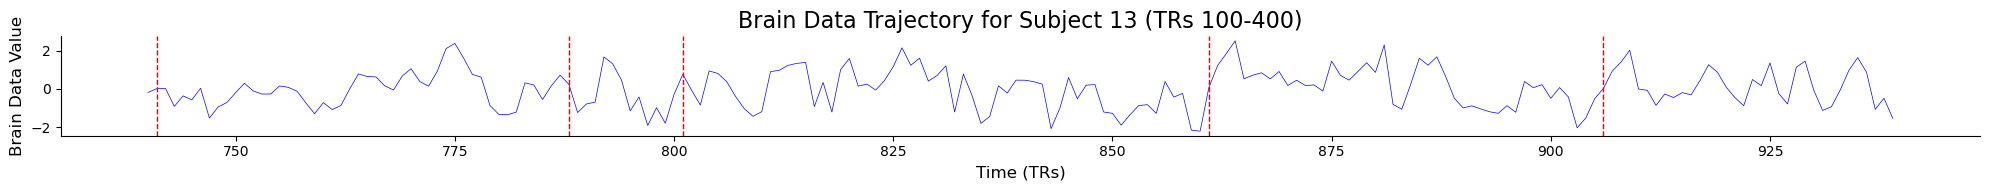

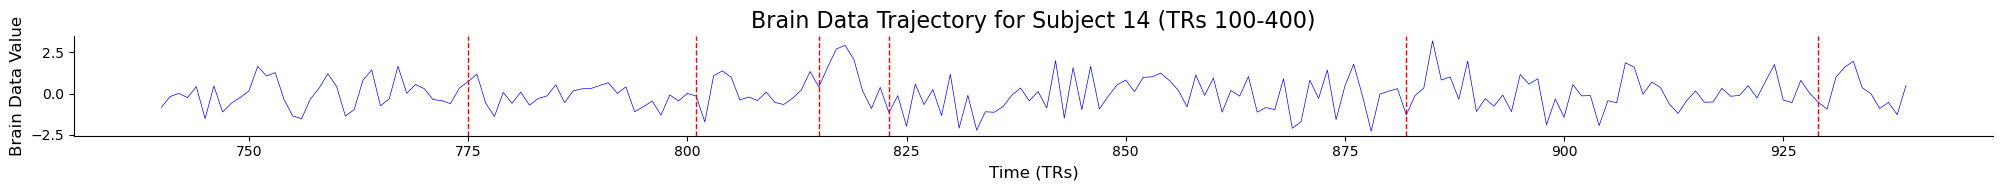

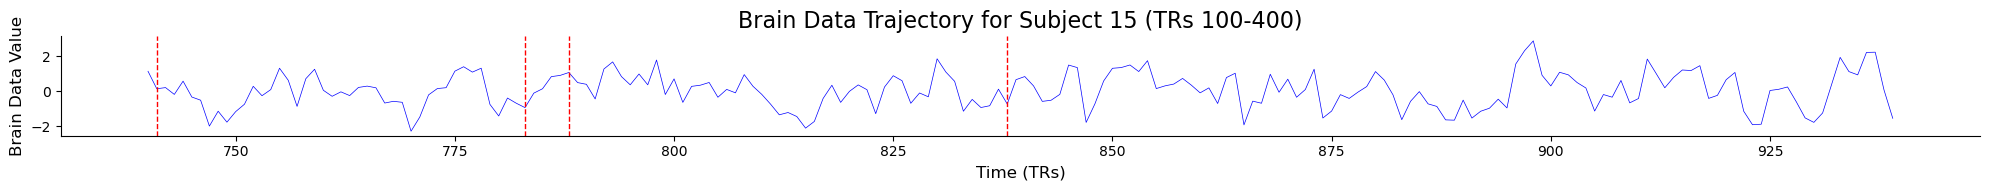

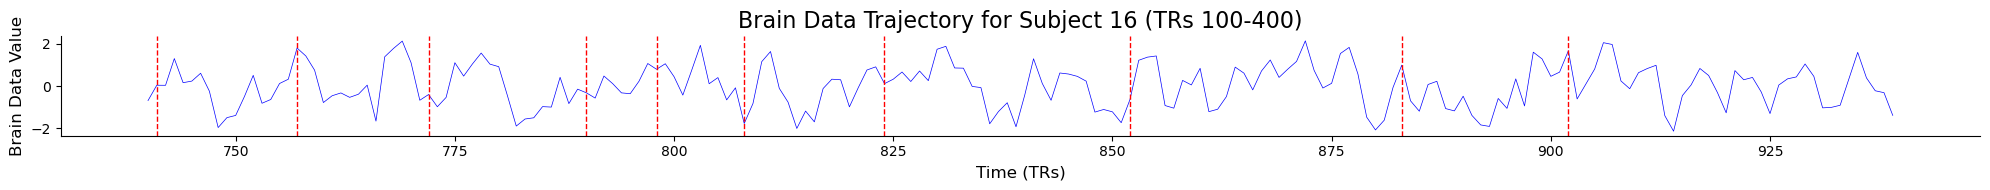

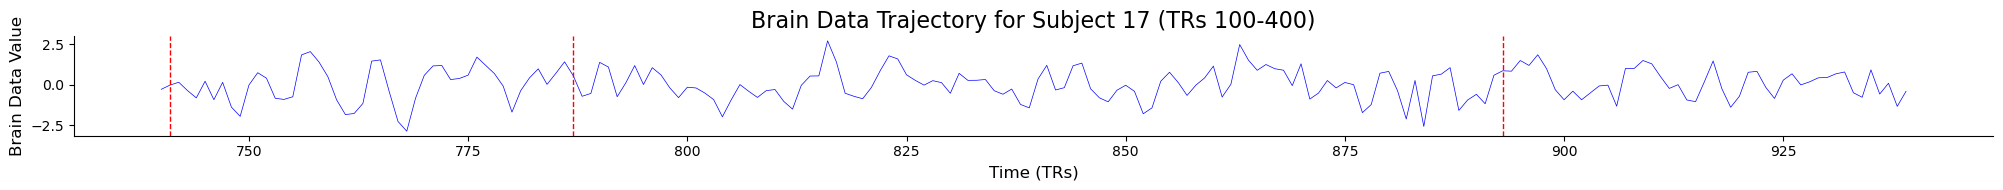

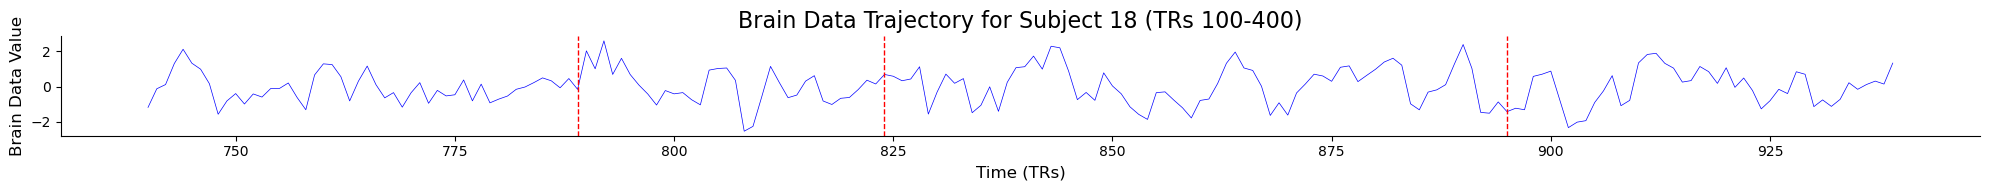

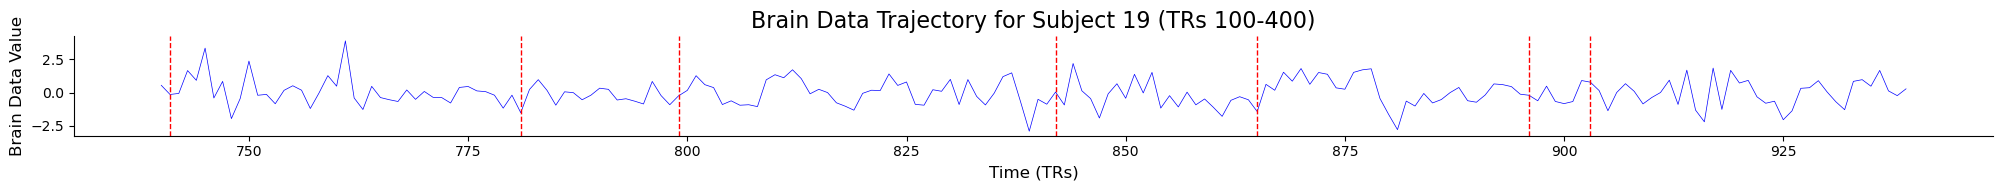

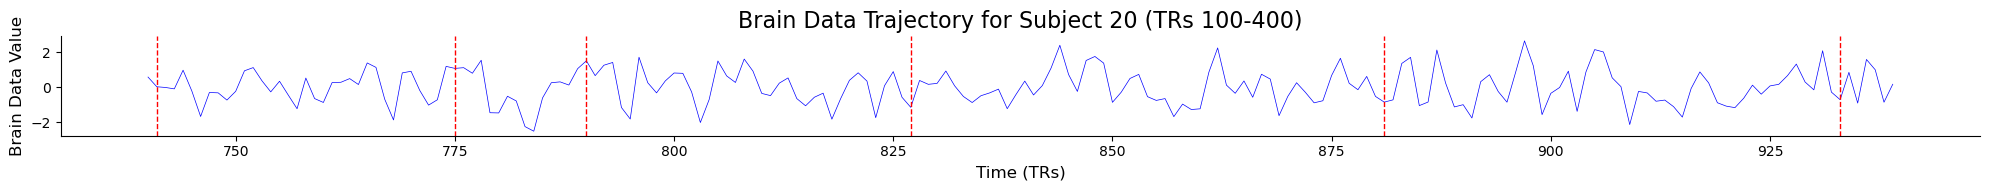

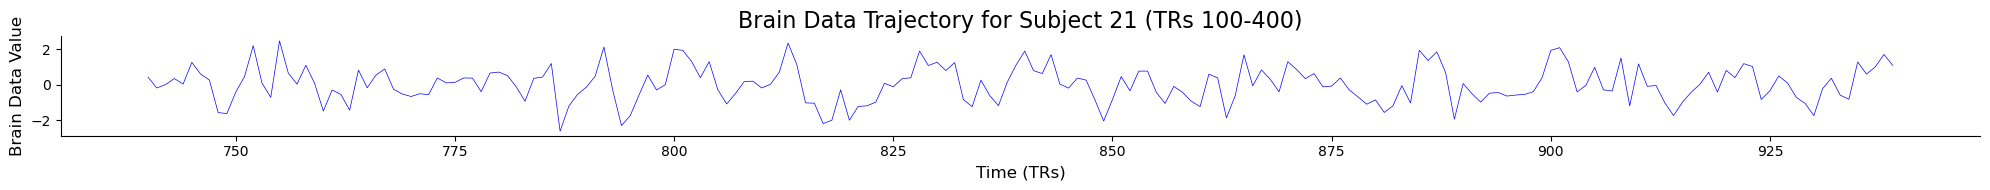

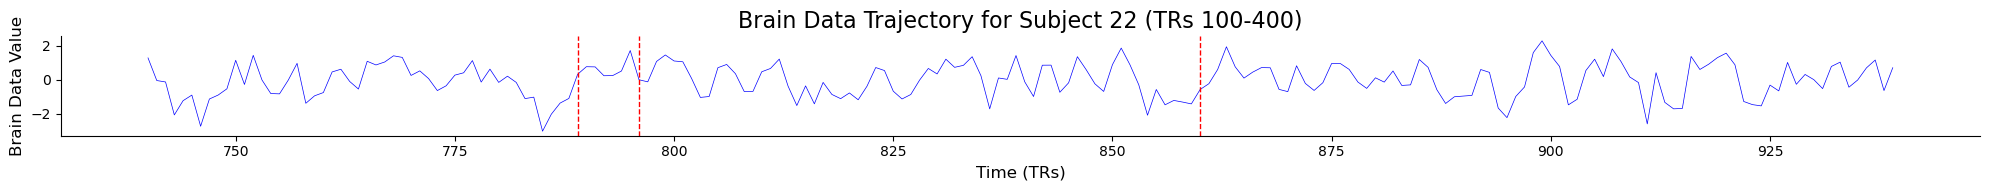

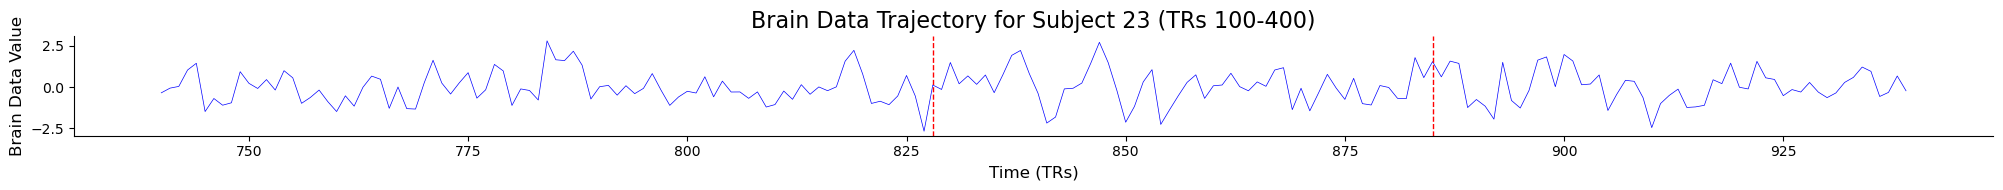

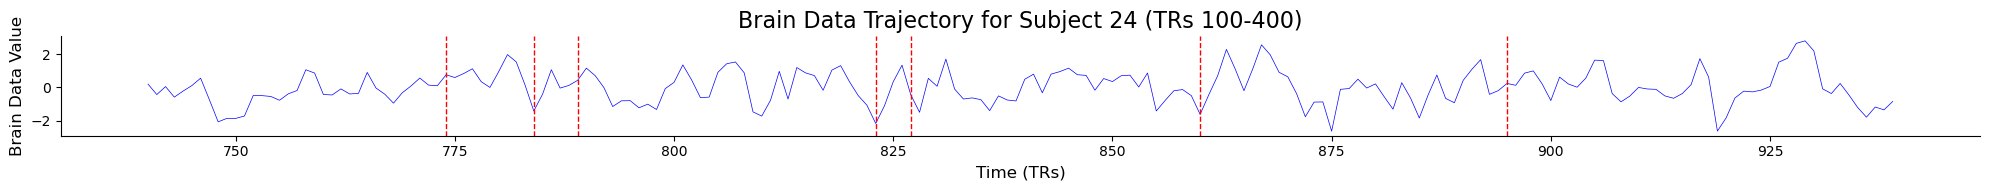

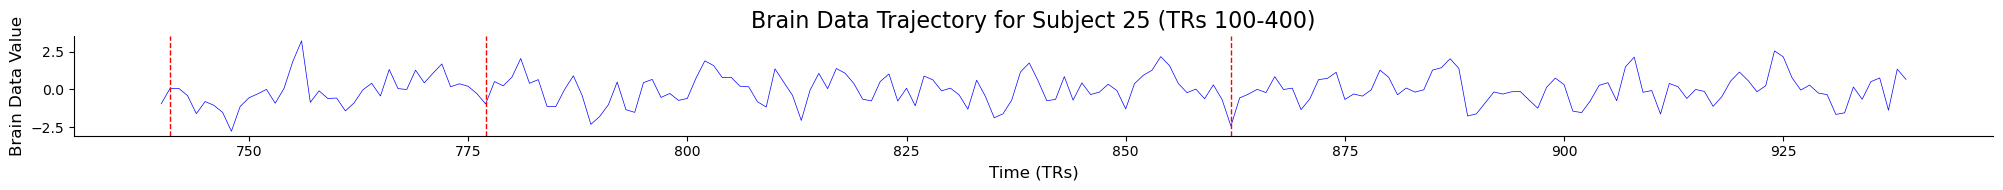

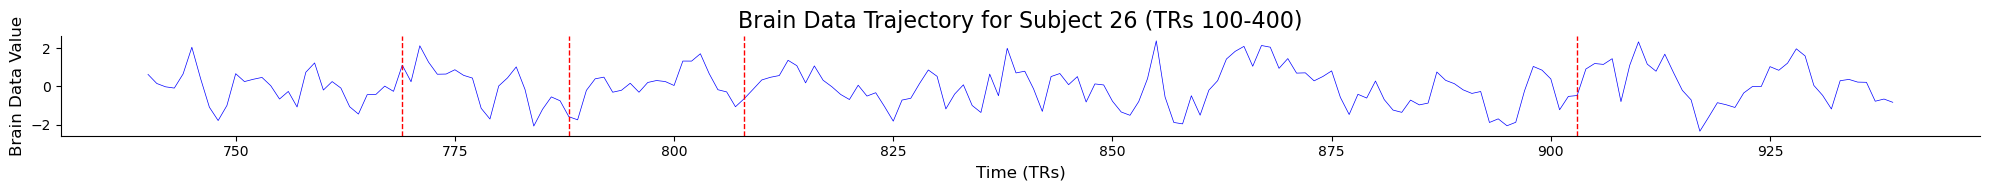

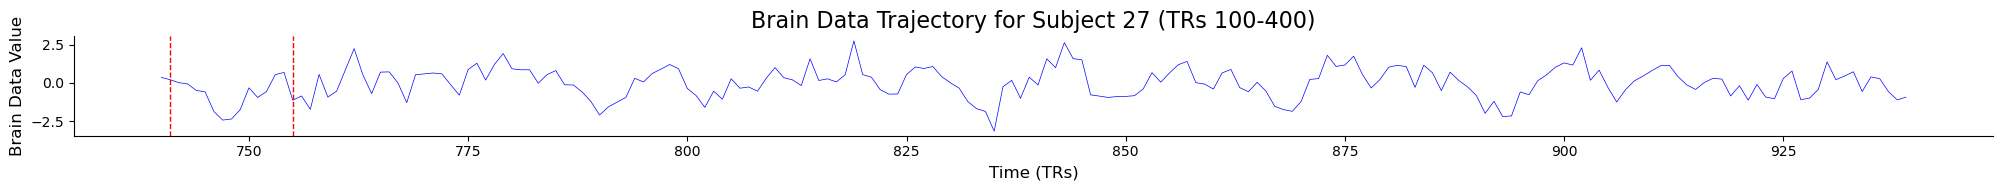

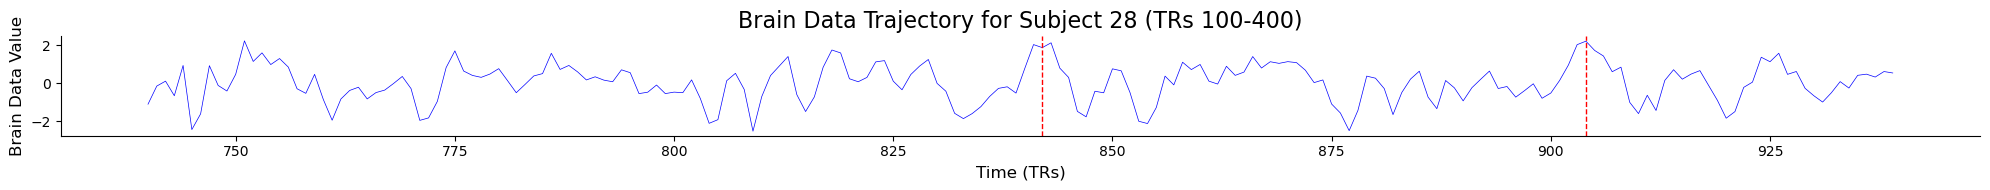

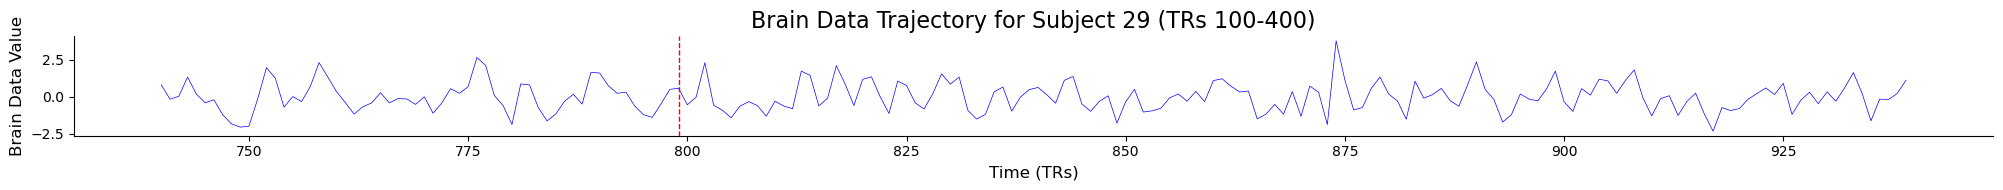

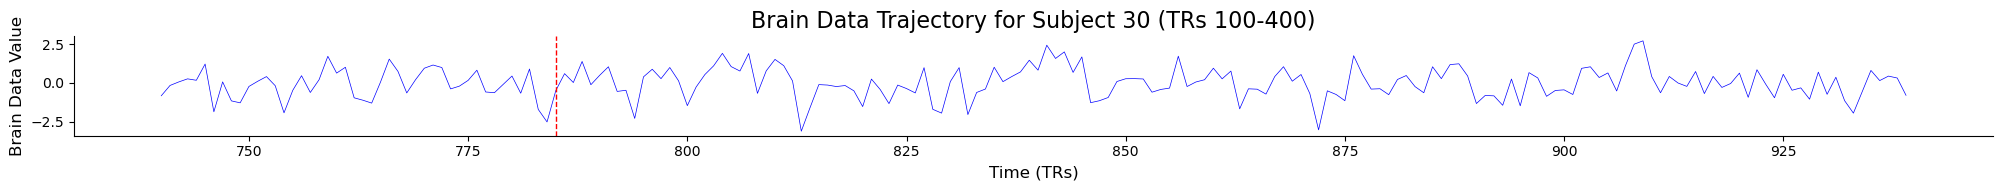

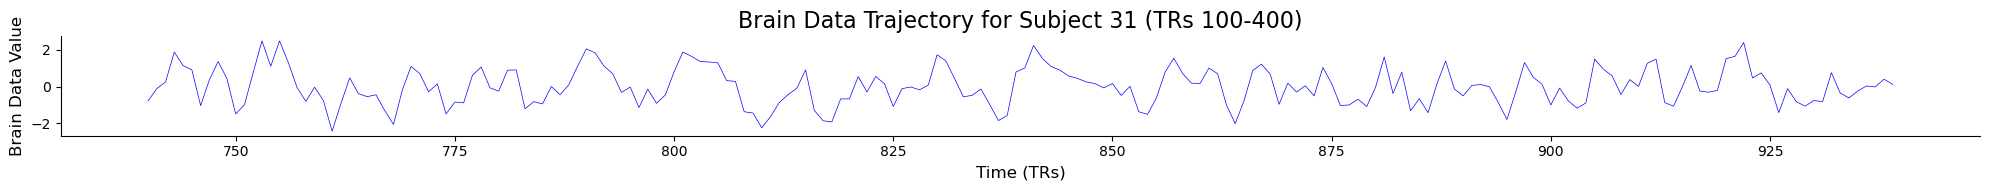

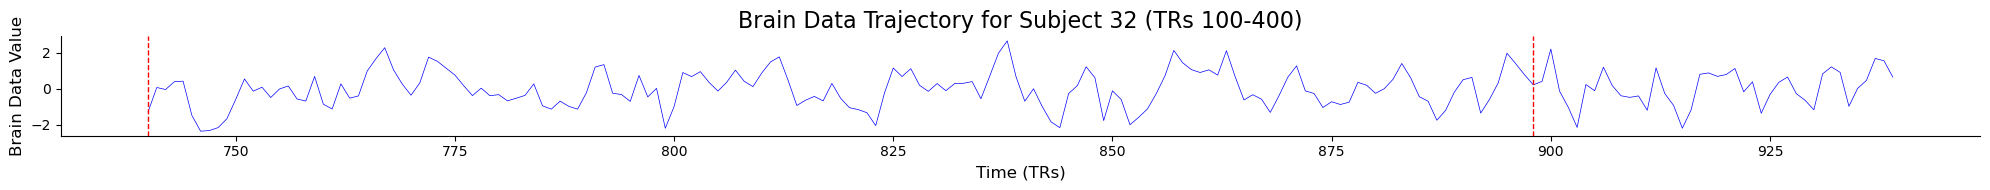

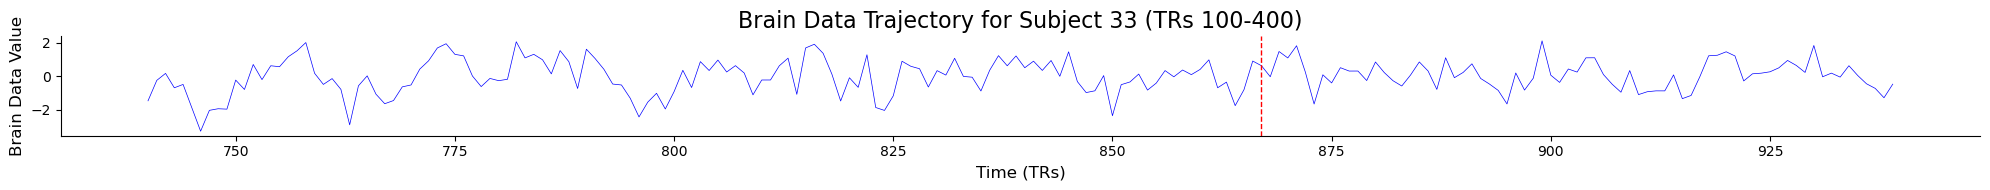

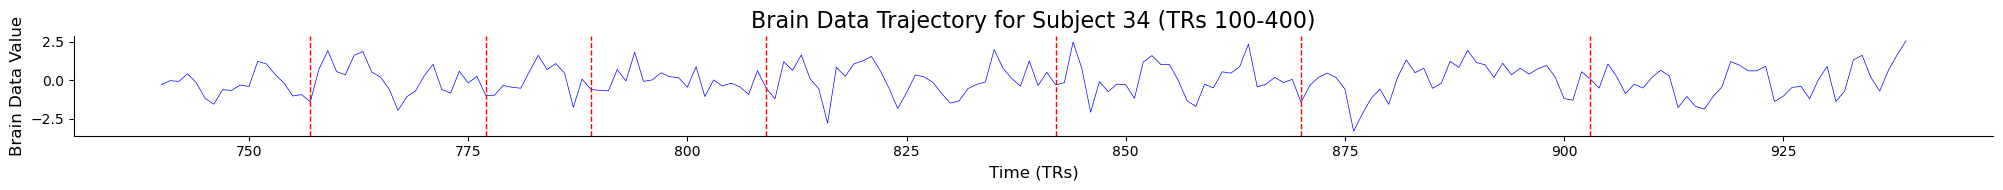

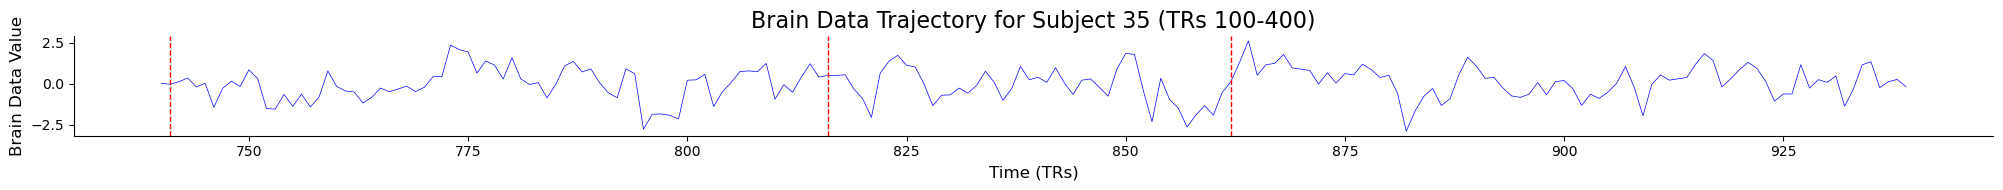

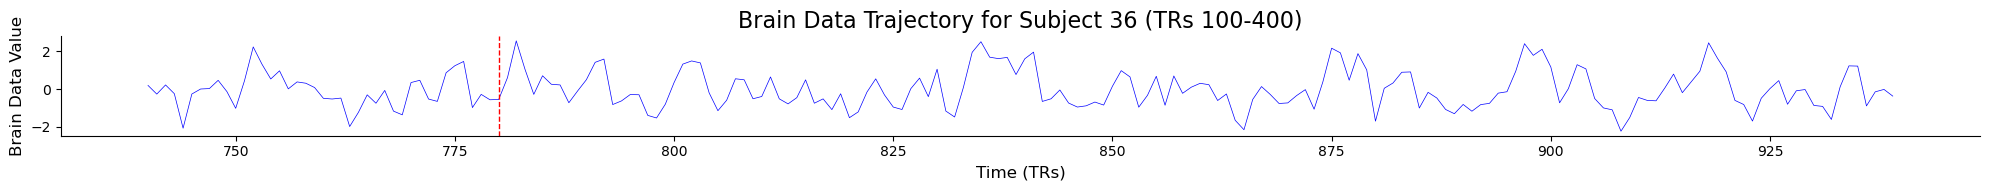

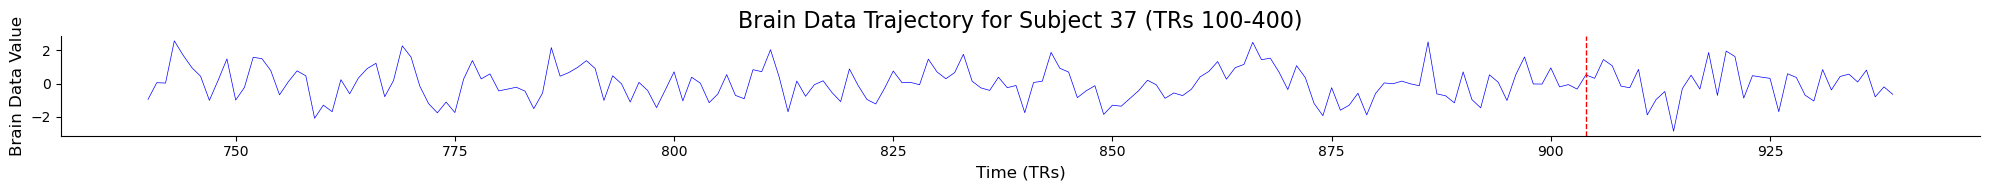

In [428]:
import matplotlib.pyplot as plt
import numpy as np

# 假设dacc_brain_data和subs_change_points是已加载的numpy数组
# 提取第2个被试的脑数据和变化点
for subject_idx in range(37):

    subject_brain_data = dacc_brain_data[subject_idx]  # 获取第2个被试的脑数据
    subject_change_points = subs_change_points[subject_idx]  # 获取第2个被试的变化点
    
    # 选择要绘制的区域，这里选择100到400
    start, end = 740, 940
    subject_brain_data_segment = subject_brain_data[start:end]
    subject_change_points_segment = subject_change_points[start:end]
    
    # 绘制脑数据变化轨迹
    plt.figure(figsize=(20, 2))
    plt.plot(np.arange(start, end), subject_brain_data_segment, label='Brain Data', color='blue', linewidth=0.5)
    
    # 找出变化点的索引
    change_points_idx = np.where(subject_change_points_segment == 1)[0] + start
    
    # 在变化点处画虚线
    for point in change_points_idx:
        plt.axvline(x=point, color='red', linestyle='--', linewidth=1)
    
    # 设置标题和标签
    plt.title(f'Brain Data Trajectory for Subject {subject_idx + 1} (TRs 100-400)', fontsize=16)
    plt.xlabel('Time (TRs)', fontsize=12)
    plt.ylabel('Brain Data Value', fontsize=12)
    
    # 去除上边和右边的框线
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    # 显示图像
    plt.tight_layout()
    # plt.savefig(f'sub_{subject_idx}_dACC_100_400.png', dpi=300)
    plt.show()
